<div style='width: 750px; margin-left: 30px;'><h3>A quick introduction, and playground for Multi-armed Bandit Problems/Algorithms</h3>
<br />
<div style='font-size:16px; font-family:Sans-Serif;'>

<h4>Base case</h4>
<ul style='margin-left:30px'>
<li>There is a set $\mathcal{A}$ of m actions (or arms) that is available to the agent.</li>
<li>Each action $a$ is associated with a reward distribution $\mathcal{R}^a$. </li>
<li>At each timestep $t$, the agent chooses an action $a_t \in \mathcal{A}$ and receives a reward $r_t \sim \mathcal{R}^{a_t}$.</li>
<li>The agent's goal is to maximize total reward: $ \sum_{t=1}^T r_t$.</li>
</ul> <br />
The last statement is equivalent to minimizing regret, where we define regret as the difference between the reward asscoaited with the best possible action at step $t$, and the reward that was actually received: $l_t=\max\limits_{a_t \in \mathcal{A}}\mathbf{E}[r_t|a_t]-r_t$
<p></p>
</div>
</div>

In [1]:
from bandits.environment import BaseArm, Environment
from bandits.agents import RandomAgent, EpsilonGreedyAgent, UCB1Agent, ThompsonBernoulliAgent
from bandits.helpers import *
from scipy.stats import norm, bernoulli, beta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

/Users/edenovitzer/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
params = [.05*n for n in xrange(1, 20)]
arms = [BaseArm(bernoulli(b)) for b in params]
env = Environment(arms)
env

In [24]:
from bandits.agents import Agent

class Exp3Agent(Agent):

    def __init__(self, env, gamma):
        self.env = env
        self.gamma = gamma
        
    def play(self, T):
        from scipy.stats import rv_discrete
        
        m = self.env.m()
        actions = [i for i in xrange(m)]
        weights = np.ones(m)
        choices = np.zeros(T)
        opt_rewards = np.zeros((T, 2))
        for t in xrange(T):
            p = (1 - self.gamma) * weights / np.sum(weights) + self.gamma / m
            i = rv_discrete(values=(actions, p)).rvs()
            opt, reward = self.env.pull(i)
            weights[i] *= np.exp(self.gamma * reward / (p[i] * m))
            choices[t] = i
            opt_rewards[t, ] = np.array([opt, reward])
        return choices, opt_rewards

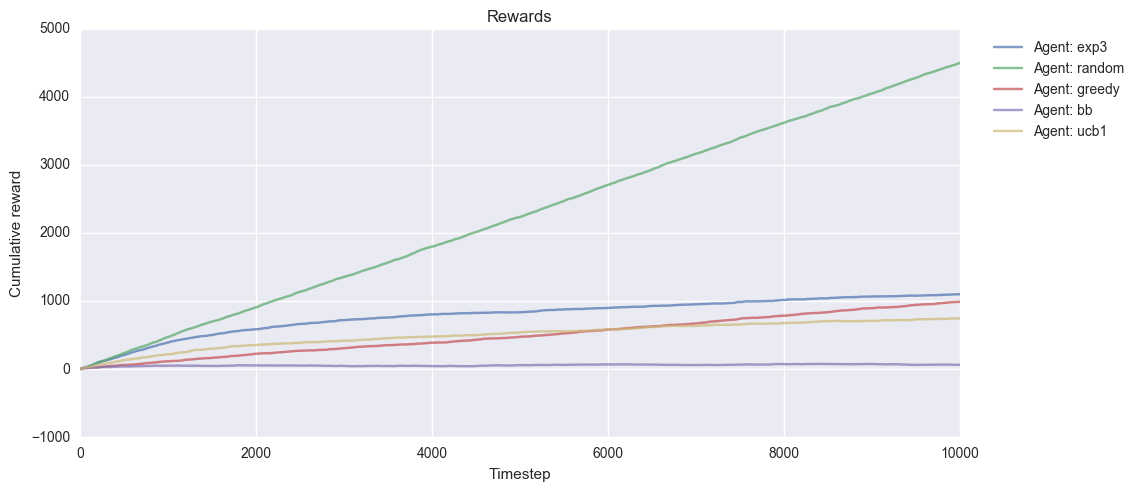

In [28]:
exp3 = Exp3Agent(env, 0.1)
agents = {"random": RandomAgent(env),
          "greedy": EpsilonGreedyAgent(env, 0.2),
          "ucb1": UCB1Agent(env),
          "bb": ThompsonBernoulliAgent(env, 1, 1),
          "exp3": Exp3Agent(env, 0.05)}
T = 10000
results = {name: agent.play(T) for name, agent in agents.items()}
plot_rewards(results)